In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt

In [111]:
data = pd.read_csv("User_Data.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [120]:
x = data.iloc[:, 2:-1] # Age and Salary
y = data.iloc[:, -1]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1)

In [114]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [116]:
prediction = naive_bayes_classifier.predict(X_test)
prediction

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [117]:
cnt = 0
for i,(y,y_hat) in enumerate(zip(Y_test, prediction)):
    if y != y_hat:
        print(f"At index = {i} expected = {y} and got = {y_hat}")
        cnt += 1
acc = (1 - (cnt/len(prediction))) * 100
print("Accuracy : ",acc)

At index = 17 expected = 1 and got = 0
Accuracy :  97.5


In [118]:
results = confusion_matrix(Y_test, prediction)
tp,fp, tn, fn = results.flatten()
accuracy = (tp + tn)/ (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp/(tp + fn)
f1_score = (2* precision * recall)/ (precision + recall)
accuracy, precision, recall, f1_score

(0.65, 1.0, 0.6410256410256411, 0.7812500000000001)

/var/folders/n0/t0xmx3v5667556mxspdfh6d40000gn/T/ipykernel_11280/2010447181.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


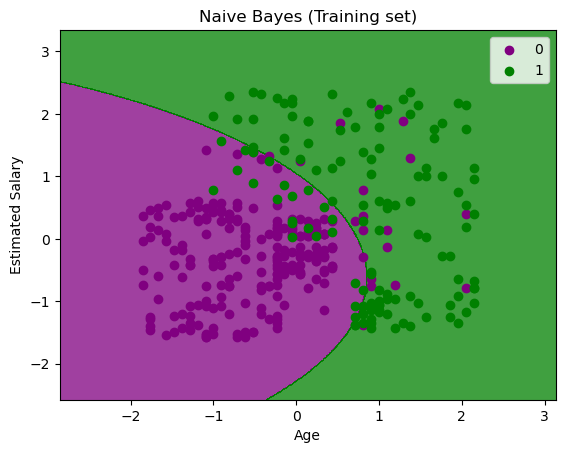

In [119]:
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, Y_train  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(X1, X2, naive_bayes_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(['purple', 'green']))  
plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(['purple', 'green'])(i), label = j)  
plt.title('Naive Bayes (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  